Flight Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data and converting to DataFrame.
df_train = pd.read_csv("Data_train.csv")
df_test = pd.read_csv("Test_set.csv")

df_train =pd.DataFrame(data=df_train)
df_test =pd.DataFrame(data=df_test)

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info


In [5]:
df_train.shape

(10683, 11)

In [6]:
df_test.shape

(2671, 10)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
#EDA & Data Processing

df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
# Dropping NaN Values if any
df_train.dropna(inplace=True)

In [10]:
# Checking for Duplicates
duplicates= df_train[df_train.duplicated()]
duplicates.shape

(220, 11)

In [11]:
#remove duplicate rows in training dataset
df_train.drop_duplicates(keep='first',inplace=True)

In [12]:
# Checking the column
df_train["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [13]:
# replace repeating value in train set
df_train["Additional_Info"] = df_train["Additional_Info"].replace({'No Info': 'No info'})

In [14]:
df_train["Destination"].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [15]:
df_test["Destination"].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [16]:
# replace repeating value in train set
df_train["Destination"] = df_train["Destination"].replace({'New Delhi': 'Delhi'})
df_test["Destination"] = df_test["Destination"].replace({'New Delhi': 'Delhi'})

In [17]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [18]:
# Encoding to numeric
df_train.Total_Stops.replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
df_test.Total_Stops.replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

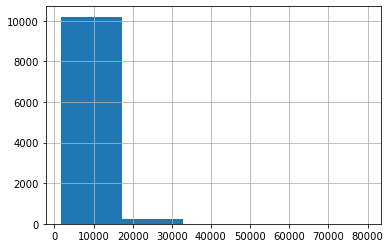

In [19]:
# Histogram of target variable.
df_train["Price"].hist(bins=5)
plt.show()

<AxesSubplot:xlabel='Airline'>

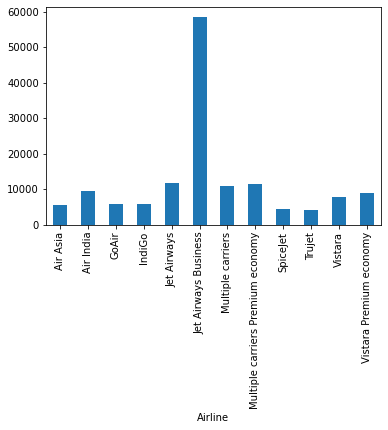

In [20]:
airline_grouped = df_train.groupby('Airline')['Price'].mean()
airline_grouped.plot.bar()

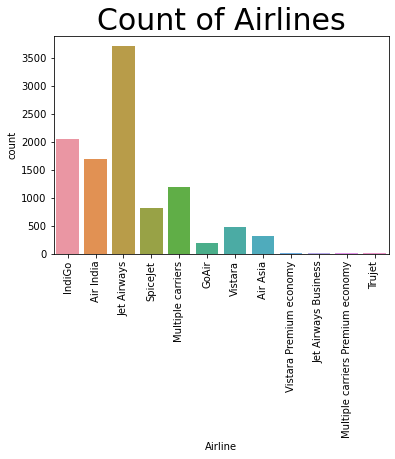

In [22]:
sns.countplot(df_train['Airline'])
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

#jet airways operates more no of flights, then indigo and airindia.
#Trujet has least no. of flights.

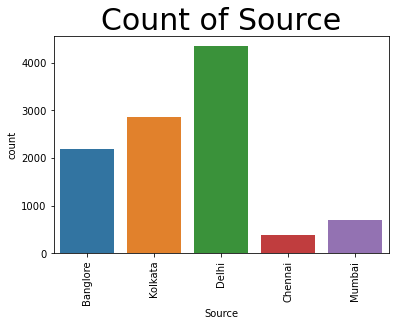

In [23]:
sns.countplot(df_train['Source'])
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()

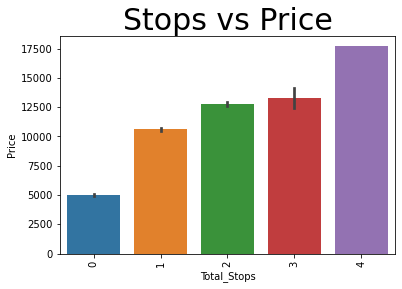

In [24]:
sns.barplot(df_train['Total_Stops'], df_train['Price'])
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

In [25]:
# Feature Scaling

# Extract day and month of journey from the above column in both train and test dataset

df_train["Day_Of_Journey"] = pd.to_datetime(df_train["Date_of_Journey"], format = '%d/%m/%Y').dt.day
df_train["Month_of_Journey"] = pd.to_datetime(df_train["Date_of_Journey"], format = '%d/%m/%Y').dt.month

df_test["Day_Of_Journey"] = pd.to_datetime(df_test["Date_of_Journey"], format = '%d/%m/%Y').dt.day
df_test["Month_of_Journey"] = pd.to_datetime(df_test["Date_of_Journey"], format = '%d/%m/%Y').dt.month

In [26]:
# Drop original feature from train and test dataset 
df_train.drop('Date_of_Journey', axis = 1, inplace = True)
df_test.drop('Date_of_Journey', axis = 1, inplace = True)

In [27]:
# extracting values from Dep_Time
df_train["Dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["Dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute

df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute

In [30]:
#Drop original feature from train and test dataset 
df_train.drop('Dep_Time', axis = 1, inplace = True)
df_test.drop('Dep_Time', axis = 1, inplace = True)

In [31]:
# extracting values from Arrival_Time

df_train["Arr_hour"] = pd.to_datetime(df_train["Arrival_Time"]).dt.hour
df_train["Arr_min"] = pd.to_datetime(df_train["Arrival_Time"]).dt.minute

df_test["Arr_hour"] = pd.to_datetime(df_test["Arrival_Time"]).dt.hour
df_test["Arr_min"] = pd.to_datetime(df_test["Arrival_Time"]).dt.minute

In [32]:
# Drop original feature from train and test dataset 
df_train.drop('Arrival_Time', axis = 1, inplace = True)
df_test.drop('Arrival_Time', axis = 1, inplace = True)

In [33]:
# Since i tried to convert 'duration' and failed lets drop the column for modelling, though its not advisable to do so.
df_train.drop('Duration', axis = 1, inplace = True)
df_test.drop('Duration', axis = 1, inplace = True)

In [34]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
df_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [35]:
# As Airline Categorical data we will perform OneHotEncoding

Airline = df_train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

In [36]:
# As Source is Categorical data we will perform OneHotEncoding

Source = df_train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

In [37]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df_train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

In [38]:
# Concatenating the encoded columns with df_train
df_train = pd.concat([df_train, Airline, Source, Destination], axis = 1)

In [39]:
df_train

,Airline,Source,Destination,Total_Stops,Price,Day_Of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arr_hour,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,0,1,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,...,0,0,0,0,1,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,...,0,0,0,0,1,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,...,0,0,0,0,0,0,0,1,0,0
10681,Vistara,Banglore,Delhi,0,12648,1,3,11,30,14,...,1,0,0,0,0,0,0,1,0,0


In [40]:
df_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

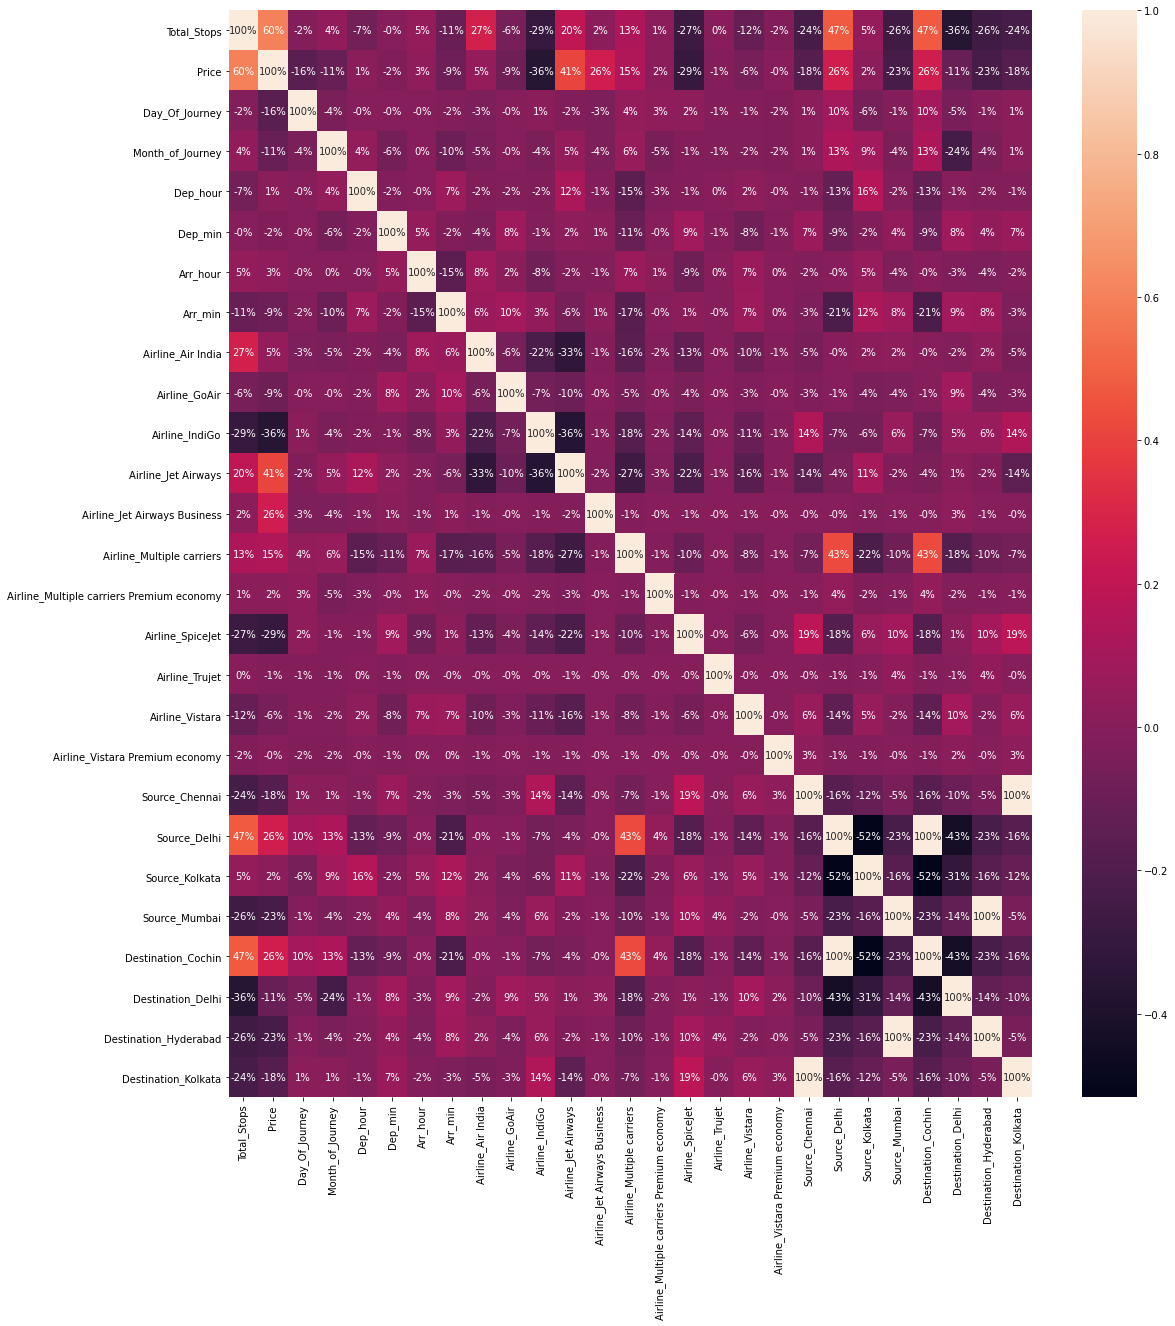

In [44]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,20))
sns.heatmap(df_train.corr(), annot = True, fmt='.0%')
plt.show()

In [45]:
#Modelling

y= df_train['Price']
x= df_train.drop('Price', axis=1)

In [46]:
x_train, x_test,y_train,y_test =train_test_split(x,y,test_size = 0.2, random_state = 42)

In [47]:
# Random Forest Regressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.9544114038613861

In [48]:
y_pred=rfr.predict(x_test)
print(y_test)
# finding the mean squared error and variance

print("MAE:" , metrics.mean_absolute_error(y_test,y_pred))
print("MSE:" , metrics.mean_squared_error(y_test,y_pred))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

2150     17996
3784      3873
714       4462
7558      2228
7413      4991
         ...  
653      12898
8607     12898
10261    11627
10581     6795
5285     13377
Name: Price, Length: 2093, dtype: int64
MAE: 1159.2258922197539
MSE: 3842229.74644372
RMSE: 1960.1606430197808


In [49]:
metrics.r2_score(y_test, y_pred)

0.8157228385464097

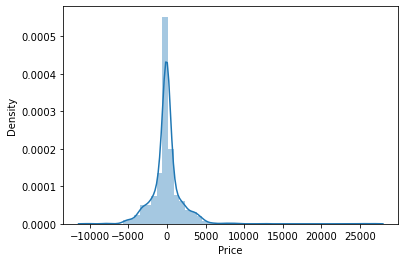

In [50]:
sns.distplot(y_test-y_pred)
plt.show()

In [51]:
# Decision tree Regressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1361.4839146360885
MSE: 5686279.374170516
RMSE: 2384.592077100508


In [52]:
metrics.r2_score(y_test, y_pred)

0.8157228385464097

In [53]:
# Hyper Parameter Tuning

param_rf = {'n_estimators':[80,110,140,170], 'max_depth':[17,18,19,20],
            'min_samples_split':[5,10,20,30,50,80], 'min_samples_leaf':[1,2,3],
            'max_features':['log2','sqrt','auto']}

In [54]:
gridRF = RandomizedSearchCV(estimator = rfr, param_distributions = param_rf, scoring = 'neg_mean_absolute_error', n_iter = 40)

In [55]:
gridRF.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=40,
                   param_distributions={'max_depth': [17, 18, 19, 20],
                                        'max_features': ['log2', 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [5, 10, 20, 30, 50,
                                                              80],
                                        'n_estimators': [80, 110, 140, 170]},
                   scoring='neg_mean_absolute_error')

In [56]:
gridRF.best_params_

{'n_estimators': 170,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [57]:
import pickle
# save the model to disk
filename = 'flightprice_rfr.pkl'
pickle.dump(rfr,open(filename,'wb'))